In [2]:
if(!"argparse" %in% installed.packages()) install.packages("argparse")
source("src/sweep_regions.R")
options(repr.plot.width=18, repr.plot.height=12)

suppressMessages(library(tidyverse))
suppressMessages(library(unglue))
theme_set(theme_classic(22))
1 + 1

[1] 2

output/raisd/RAiSD_Report.rep-398_seed1-36008_seed2-65420_startfreq-0.0_endfreq-0.999_alpha-50_sub-2



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  position = col_double(),
  mu = col_double()
)




# A tibble: 1 x 5
  chromosome sweep_group  start    end sweep_size
  <chr>            <int>  <dbl>  <dbl>      <dbl>
1 chr0                 0 195392 207610      12218
[1] "sweeps found"
[1] 1
  rep seed1 seed2 start_freq end_freq alpha sub
1 398 36008 65420        0.0    0.999    50   2
# A tibble: 1 x 7
  chromosome sweep_group  start    end sweep_size true_covered truth_class  
  <chr>            <int>  <dbl>  <dbl>      <dbl>        <int> <chr>        
1 chr0                 0 195392 207610      12218            1 true_positive


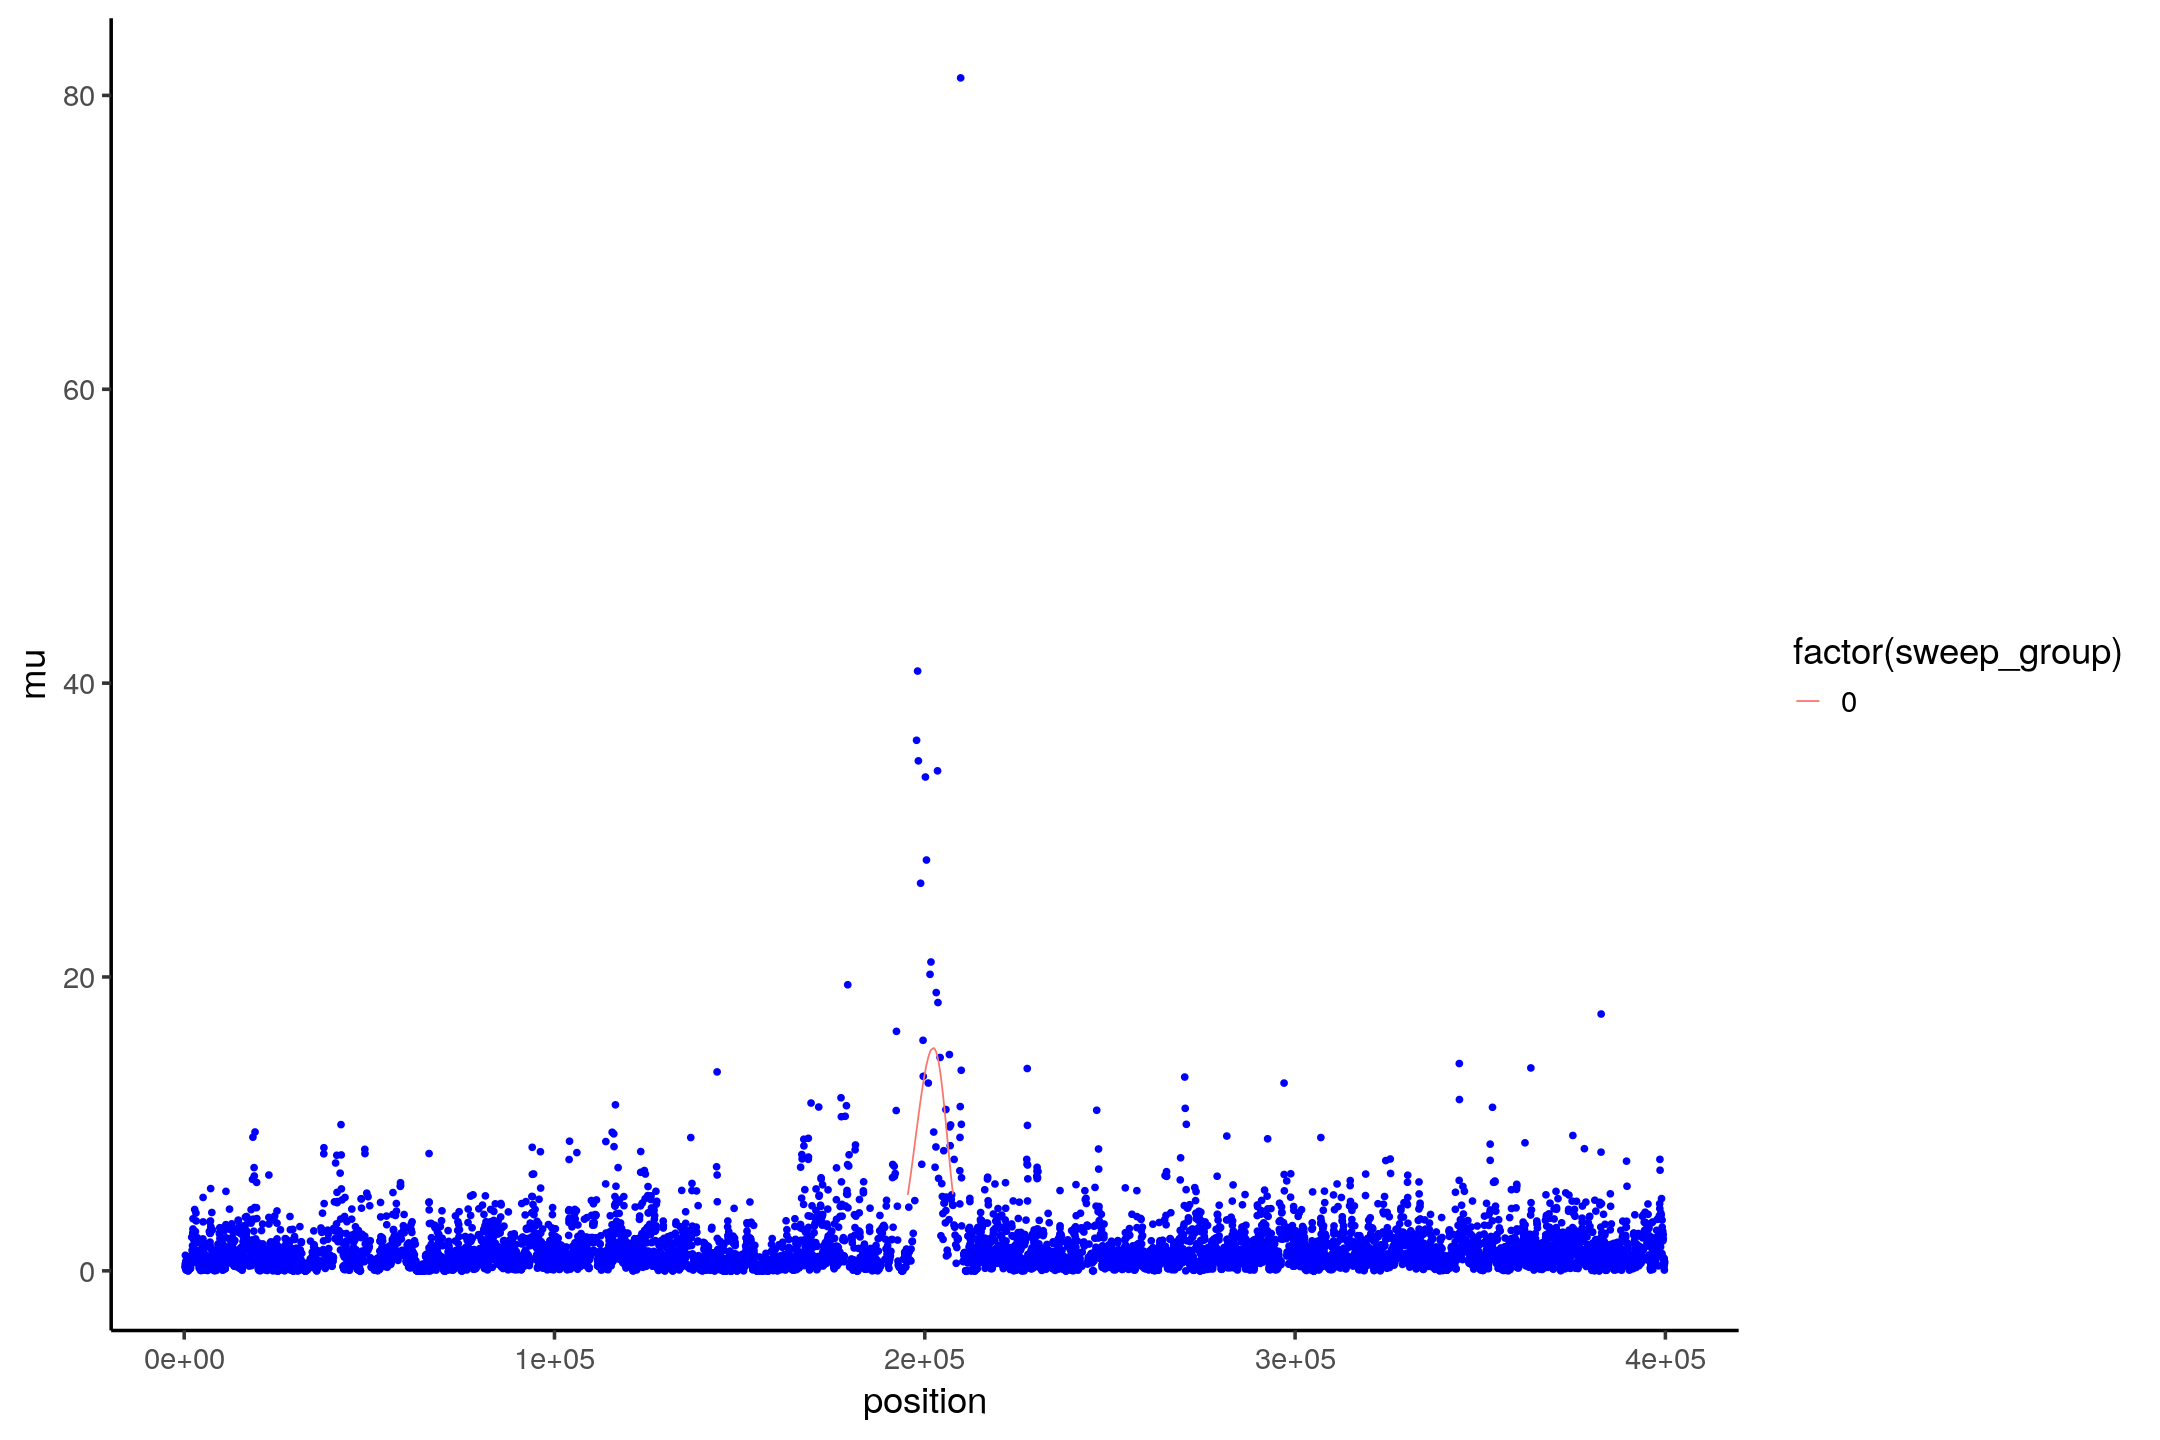

In [3]:
files <- fs::dir_ls("output/raisd/", regexp = "RAiSD_Report")
unglue_str <- "output/raisd/RAiSD_Report.rep-{rep}_seed1-{seed1}_seed2-{seed2}_startfreq-{start_freq}_endfreq-{end_freq}_alpha-{alpha}_sub-{sub}"

.x <- sample(1:length(files), 1)
random_file <- files[.x]
meta_df <- unglue(random_file, unglue_str)[[1]]
#random_file <- "output/raisd/RAiSD_Report.rep-955_seed1-10820_seed2-57380_startfreq-0.0_endfreq-0.999_alpha-100_sub-1"
print(random_file)
sweep_sim_df <- read_tsv(file = random_file, skip = 1, col_names = c("position", "mu"))

minsize <- 3000; maxsize <- 1e10; msize <- 5e4; cutoff <- 5
out_full <- make_sweep_regions(
    chromosome = "chr0",
    positions = sweep_sim_df$position,
    mu_vector = sweep_sim_df$mu,
    minimum_size = minsize,
    maximum_size = maxsize,
    merge_size = msize,
    cutoff = cutoff,
    full_dataframe = TRUE
  )


out_summmary <- make_sweep_regions(
    chromosome = "chr0",
    positions = sweep_sim_df$position,
    mu_vector = sweep_sim_df$mu,
    minimum_size = minsize,
    maximum_size = maxsize,
    merge_size = msize,
    cutoff = cutoff,
    full_dataframe = FALSE
  )

print(out_summmary)
print("sweeps found")
print(length(unique(out_summmary$sweep_group)))
if(nrow(out_full) > 0){
ggplot() +
    geom_point(data = sweep_sim_df, aes(position, mu), colour = "blue") +
    geom_line(
        data = out_full, 
        aes(positions, mu_vector, 
            group = sweep_group, 
            colour = factor(sweep_group))
    )
    
} else {
    ggplot() +
    geom_point(data = sweep_sim_df, aes(position, mu), colour = "blue")
}

print(meta_df)
if(meta_df$alpha == 0){
    true_positions <- c(200000)
    true_labels  <- c("neutral")    
} else {
    true_positions <- c(200000)
    true_labels  <- c("sweep")
}

if(nrow(out_summmary) > 0 ){
        out_summmary %>% 
        label_TF_positives(true_positions, true_labels) %>%
        label_TF_negatives(true_positions, true_labels) %>% print()
} else {
    out_summmary %>% label_TF_negatives(true_positions, true_labels) %>% print()
}


In [115]:
nrow(out_summmary)

[1] 0

In [69]:
#how do things look with two PC reps?
 
pc_neutral_path <- "/group/jrigrp10/stittes/parv_local_v5_til11/data/mushi/RAiSD_Report.v5--Teo--random1_Palmar_Chico--msprime"
pc_rep1_path <- "/group/jrigrp10/stittes/parv_local_v5_til11/data/raisd/RAiSD_Report.v5--Teo--random1_Palmar_Chico--chr2--0--243675191.corrected"
pc_rep2_path <- "/group/jrigrp10/stittes/parv_local_v5_til11/data/raisd/RAiSD_Report.v5--Teo--random2_Palmar_Chico--chr2--0--243675191.corrected"


colnames <- c("chromosome", "mid", "start", "end", "mu1", "mu2","mu3", "mu") 
pc_rep1 <- vroom::vroom(pc_rep1_path, col_names = colnames)
pc_rep2 <- vroom::vroom(pc_rep2_path, col_names = colnames)
pc_neutral <- vroom::vroom(pc_neutral_path, col_names = c("position", "mu"), skip = 1) %>% drop_na()


smooth_model <- smooth.spline(pc_neutral$position, pc_neutral$mu)
q_out <- quantile(smooth_model$y, 1.0)
cat(paste0("neutral cutoff: ", round(q_out, 5), "\n"))

minsize <- 5000; maxsize <- 1e7; msize <- 1e6; cutoff <- q_out
sweeps_pc1 <- make_sweep_regions(
      chromosome = "chr1",
      positions =  pc_rep1$mid,
      mu_vector =  pc_rep1$mu,
      minimum_size = minsize,
      maximum_size = maxsize,
      merge_size = msize,
      cutoff = cutoff,
      full_dataframe = FALSE
    )

sweeps_pc2 <- make_sweep_regions(
      chromosome = "chr1",
      positions =  pc_rep2$mid,
      mu_vector =  pc_rep2$mu,
      minimum_size = minsize,
      maximum_size = maxsize,
      merge_size = msize,
      cutoff = cutoff,
      full_dataframe = FALSE
    )


Rows: 934,739
Columns: 8
Delimiter: "\t"
chr [1]: chromosome
dbl [7]: mid, start, end, mu1, mu2, mu3, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,108,347
Columns: 8
Delimiter: "\t"
chr [1]: chromosome
dbl [7]: mid, start, end, mu1, mu2, mu3, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 225,275
Columns: 2
Delimiter: "\t"
dbl [2]: position, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



neutral cutoff: 2.32754


[1] 0
[1] 0


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'sweep_group' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pa

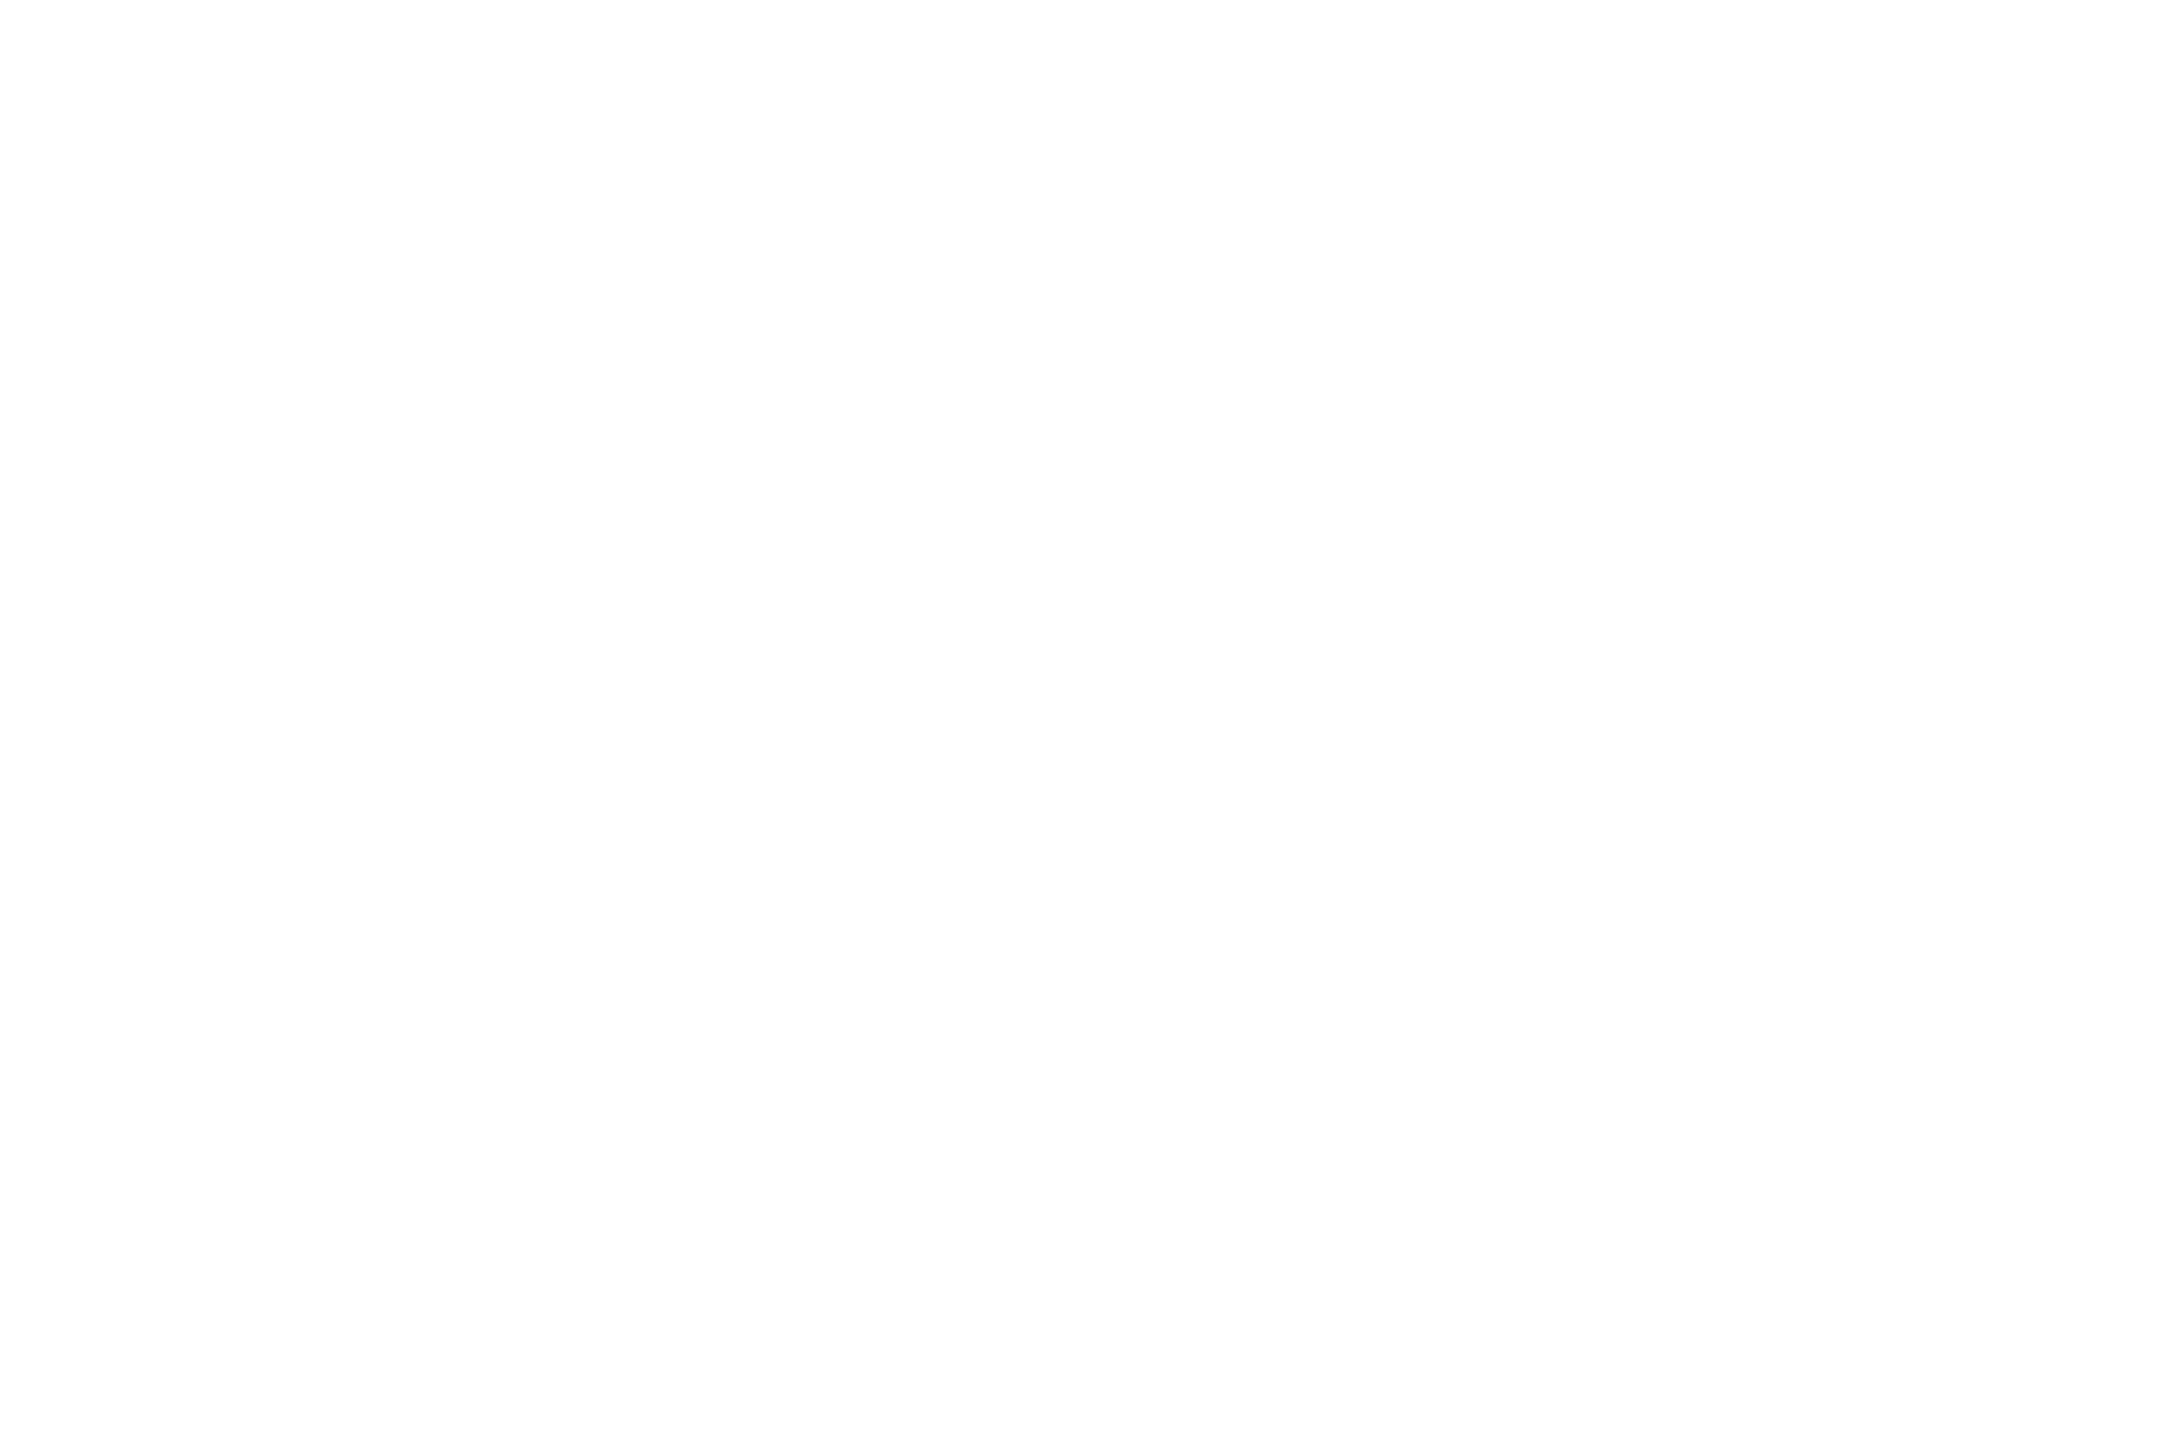

In [73]:
print(nrow(sweeps_pc1))
print(nrow(sweeps_pc2))

ggplot() +
 geom_segment(data = sweeps_pc1, aes(x = start, y = sweep_group, xend = end, yend = sweep_group), colour = 'blue', lwd = 3) +
 geom_segment(data = sweeps_pc2, aes(x = start, y = sweep_group+0.1, xend = end, yend = sweep_group+0.1), colour = 'red', lwd = 3)
